## Машинное обучение <br> Вероятностный подход

Пензин М.С.

penzin.ml.tsu@gmail.com

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Задачи машинного обучения

## Машинное обучение

**Машинное обучение (Machine Learning)** - это обширный подраздел искусственного интеллекта, изучающий методы построения алгоритмов, способных обучаться. 

Данная дисциплина находится на стыке нескольких дисциплин, таких как математическая статистика, теория оптимизации, теории вероятности, теории графов, программирования и т.д.

## Задачи

1. Обучение с учителем:
   - Классификация
   - Регрессия     
2. Обучение без учителя:
   - кластеризация     
3. Обучение с подкреплением

## Признаки

 Пусть $\mathbf{X} = \{\vec{x}_i\}_{i=1}^N$ - набор объектов (прецедентов), где $\vec{x}_i$ - вектор признаков (feature) 

 - бинарные

 - категориальные

 - количественные

## Обучение с учителем

При обучении с учителем имеется набор целевых исходов $ Y = \{t_i\}_{i = 1}^N $. 

**Задача:** при заданном прецеденте получить целевой исход.

## Классификация

* $\mathbf{X}$ - набор прецедентов
* $Y$ - набор меток класса
 
**Задача:** построить модель $f(\vec{x})$ на основе $\mathbf{X}$ и $Y$, такую что на основе вектора признаков  $\vec{x}$  данная модель возвращала признак класса __y__ или вектор оценок принадлежности к какому-то классу.

## Регрессия

 * $\mathbf{X}$ - набор прецедентов
 * $Y$ - набор значений некой величины

**Задача:** построить модель $f(\vec{x})$ на основе $\mathbf{X}$ и $Y$, такую что на основе вектора признаков $\vec{x}$ данная модель возвращала значение некой величины __y__, либо апостериорное распределение этой величины.

## Оценка качества

Одним из популярных способов оценки качества работы модели является расчет среднеквадратичной ошибки

$$
L(f) = \sum_{n=0}^{N-1} \frac{1}{N} \left(f(\vec{x}_n) - y_i\right)^2
$$

Обычно такую функцию называют **функцией потерь (Loss function)**

## Основные проблемы

Одной из специфик машинного обучения является проблема переобучения модели.

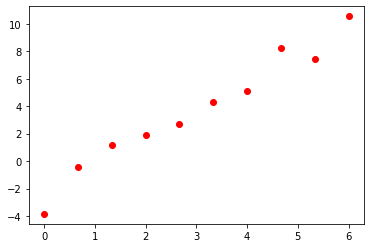

In [31]:
f = lambda x: 2 * x - 3

x = np.linspace(0, 6, 10)
y = f(x)
noise = np.random.normal(0, 1, y.shape)
yn = y + noise
plt.plot(x, yn, "ro", label="signal+noise")
plt.show()

In [32]:
# Фит полиномом первой степени
z = np.polyfit(x, yn, 1)
p_lin = np.poly1d(z)
z

array([ 2.10222531, -2.59932762])

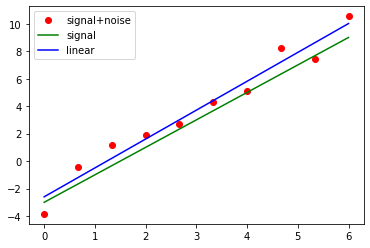

In [33]:
plt.plot(x, yn, "ro", label="signal+noise")
plt.plot(x, y, "g-", label="signal")
plt.plot(x, p_lin(x), "b-", label="linear")
plt.legend()
plt.show()

In [34]:
# Фит полиномом 9-й степени
z = np.polyfit(x, yn, 9)
p_9 = np.poly1d(z)
z

array([ 1.39352400e-02, -3.60763980e-01,  3.90953348e+00, -2.30355404e+01,
        8.01836152e+01, -1.67572845e+02,  2.03961054e+02, -1.32620524e+02,
        3.94344546e+01, -3.84530899e+00])

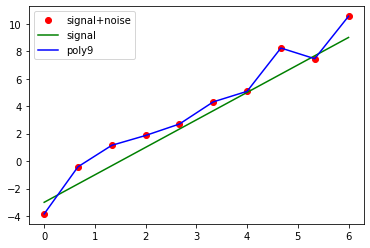

In [35]:
plt.plot(x, yn, "ro", label="signal+noise")
plt.plot(x, y, "g-", label="signal")
plt.plot(x, p_9(x), "b-", label="poly9")
plt.legend()
plt.show()

In [36]:
# Посмотрим экстраполяцию данных

f(10), p_lin(10), p_9(10)

(17, 18.422925513437026, 452358.9087061662)

## Обучение без учителя

Задается только набор прецедентов.

**Зачада:** разбиение данных на кластеры или определение нового набора признаков (с меньшим их количеством)

## Кластеризация

  * $\mathbf{X}$ - набор прецедентов
 
**Задача:** построить модель $f(\vec{x})$, такую что разобъет набор прецедентов $\mathbf{X}$ на непересекающиеся кластеры. При этом в каждом кластере будут находится, в некотором роде похожие друг на друга прецеденты.

# Теория вероятности

In [3]:
df = pd.read_csv("../data/mlbootcamp5_train.csv", 
                 sep=";", 
                 index_col="id")
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Случайная величина

Пусть $x$ - это некоторая случайная величина. Она может быть 
* дискретной
* непрерывной

## Дискретная случайная величина

Вероятность дискретной случайной величины можно определить как

$$
P(x) = \lim_{N \rightarrow \infty} \frac{n_{x}}{N}
$$

In [67]:
# Пример дискретной случайной величины
x = np.random.randint(0, 2, 1000000)
print(x[:10])
print(x.sum() / x.shape[0])

[0 1 1 0 1 1 1 0 0 1]
0.49982


In [39]:
df['gender'].value_counts() / df.shape[0]

1    0.650429
2    0.349571
Name: gender, dtype: float64

## Непрерывная случайная величина

Вероятность непрерывной случайной величины всегда определяется в пределах какого-то интервала

$$
P(x \le \tilde{x} \le x + dx) = \lim_{N\rightarrow\infty} \frac{n_x}{N}
$$

Плотность вероятности:
$$
f(x)dx = P(x \le \tilde{x} \le x +dx)
$$

Функция вероятности
$$
P(x_1 \le \tilde{x} \le x_2) = \int_{x_1}^{x_2} f(x) dx = F(x_2) - F(x_1) \\
F(x) = P(\tilde{x} \le x) = \int_{-\infty}^x f(\tilde{x}) d\tilde{x}
$$

In [40]:
df[(65 <= df['weight']) & (df['weight'] <= 75)].shape[0] / df.shape[0]

0.36428571428571427

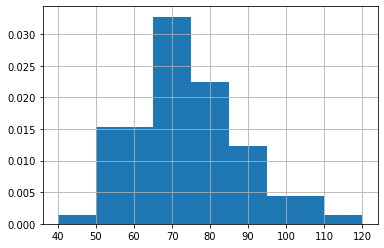

In [41]:
df['weight'].hist(bins=(40, 50, 65, 75, 85, 95, 110, 120), density=True);

## Биномиальное распределение

Пусть $p$ - вероятность выпадения орла, тогда вероятность того, что $r$ раз подряд выпадет орел и $N-r$ раз выпадет решка

$$
p^r (1 - p)^{N-r}
$$

Это всего лишь один из $C_N^r$ способов получить $r$ орлов при $N$ бросках монеты.

$$
P(r) = C_N^r p^r(1 - p)^{N-r} \\
C_N^r = \frac{N!}{r!(N-r)!}
$$

## Распределение Пуассона

Показывается вероятность появления $r$ событий за фиксированный промежуток времени при средней интенсивности событий $\lambda$

$$
P(r) = \frac{\lambda^r}{r!} e^{-\lambda}
$$

## Равномерное распределение

$$
f(x) = \left\{  
\begin{matrix}
\frac{1}{a-b},& x \in [a,b) \\
0,& x \notin [a,b)
\end{matrix}
\right.
$$

In [42]:
from scipy.stats import uniform

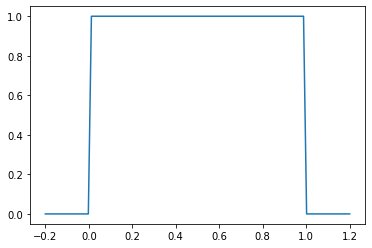

In [43]:
x = np.linspace(-0.2, 1.2, 100)
plt.plot(x, uniform.pdf(x));

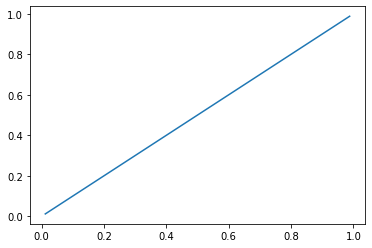

In [44]:
plt.plot(x, uniform.ppf(x));

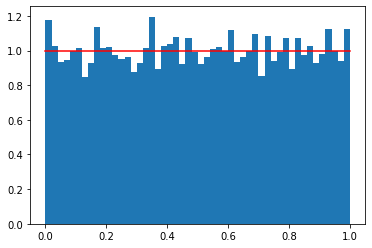

In [45]:
x = np.random.uniform(0, 1, 10000)
xv = np.linspace(x.min(), x.max(), 100)
plt.hist(x, density=True, bins=50)
plt.plot(xv, uniform.pdf(xv), "r");

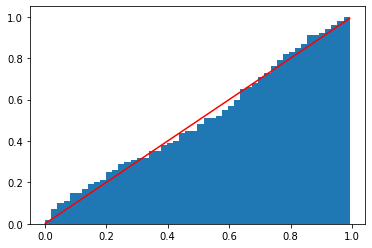

In [46]:
x = np.random.uniform(0, 1, 100)
xv = np.linspace(x.min(), x.max(), 100)
plt.hist(x, density=True, cumulative=True, bins=50)
plt.plot(xv, uniform.cdf(xv), "r");

## Нормальное распределение

$$
f(x) = \frac{1}{ \sqrt{2\pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

In [47]:
from scipy.stats import norm

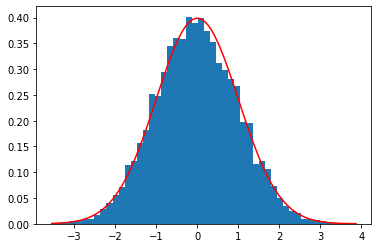

In [48]:
x = np.random.normal(0, 1, 10000)
xv = np.linspace(x.min(), x.max(), 100)
plt.hist(x, density=True, bins=50)
plt.plot(xv, norm.pdf(xv), "r");

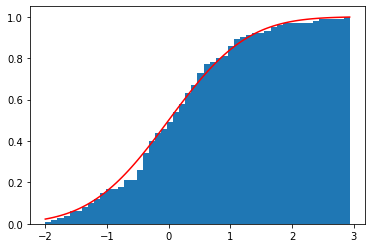

In [49]:
x = np.random.normal(0, 1, 100)
xv = np.linspace(x.min(), x.max(), 100)
plt.hist(x, density=True, cumulative=True, bins=50)
plt.plot(xv, norm.cdf(xv), "r");

## Математическое ожидание (среднее)

Для дискретное случайной величины

$$
\mu = E[x] = \sum_r r P(x=r)
$$

Для непрерывной случайной величины

$$
\mu = E[x] = \int_{-\infty}^{+\infty} x f(x) dx
$$

Можно определенить среднее значение функции от случайной величины $x$

Для дискретной

$$
\mu = E[g(x)] = \sum_r g(r) P(x=r)
$$

Для непрерывной

$$
\mu = E[g(x)] = \int_{-\infty}^{+\infty} g(x) f(x) dx
$$

## Среднеквадратичное отклонение (дисперсия)

Для дискретной

$$
\sigma^2 = D[x] = \sum_r (r-\mu)^2 P(x=r)
$$

Для непрерывной
$$
\sigma^2 = D[x] = \int_{-\infty}^{\infty} (x-\mu)^2 f(x) dx
$$

## Выборочное среднее и выборочная дисперсия

$$
    \bar{\mu} = \frac{1}{N} \sum_{i=0}^{N-1} x_i
$$

$$
    \bar{\sigma}^2 = \frac{\sum\limits_{i=0}^{N-1} \left(x_i^2 - \bar{\mu}^2 \right) }{N-1}
$$

## Сложение вероятностей

$$
P(A+B) = P(A) + P(B) - P(AB)
$$

<div><img style="margin-left:auto; margin-right: auto" src="./AB.png"/></div>

## Условная вероятность

Пусть

$$
P(A) = \frac{n_A}{N}\quad P(AB) = \frac{n_{AB}}{N} \\
P(AB) = \frac{n_A}{N}\frac{n_{AB}}{n_A} = P(A) \frac{n_{AB}}{n_A}
$$

**Условная вероятность** - это вероятность события __B__, при условии, что событие **A** уже произошло 

$$
P(B|A) = \frac{P(AB)}{P(A)}
$$

## Независимые события

Если на появления события __B__ не влияет появление события **A**, то данные события считаются независимыми

$$
P(B|A) = P(B) \\
P(AB) = P(A) P(B)
$$

## Ещё немного условной вероятности

Если подумать, то мы можем записать $P(AB)$ двумя способами

$$
P(AB) = P(A) P(B|A) = P(B) P(A|B)
$$

## Теорема Байеса

$$
P(A|B) = \frac{P(B|A) P(A)}{P(B)}
$$
* __P(A)__ - априорная вероятность гипотезы A
* __P(B)__ - полная вероятность события B
* __P(A|B)__ - вероятность гипотезы A при наступлении события B (апостериорная вероятность)
* __P(B|A)__ - вероятность наступления события B при истинности гипотезы A

## Формула полной вероятности

Если считать, что множество событий $\{A_i\}_{i=1}^N$ несовместны

$$
P(B) = \sum_i P(A_i) P(B|A_i)
$$

## Пример

Пусть имеется некое заболевание и имеется тест, которые позволяет его определить.

$$
P(+|болен) = 0.80 \\
P(-|болен) = 0.20 
$$

**Какова вероятность, что человек болен, если тест дал положительный результат?**

## Дополнительная информация

$$
\begin{matrix}
P(+|болен) = 0.80, & P(+|здоров) = 0.096 \\
P(-|болен) = 0.20, & P(-|здоров) = 0.904
\end{matrix}
$$

**Какова вероятность, что человек действительно болен, если тест дал положительный результат?**

## Дополнительная информация

$$
\begin{matrix}
P(+|болен) = 0.80, & P(+|здоров) = 0.096 \\
P(-|болен) = 0.20, & P(-|здоров) = 0.904 \\
P(болен) = 0.01,   & P(здоров) = 0.99
\end{matrix}
$$

Теперь мы можем посчитать нашу вероятность

$$
P(болен|+) = \frac{P(+|болен)}{P(+)}P(болен)
$$

$$
P(болен|+) = \frac{P(+|болен)P(болен)}{P(болен)P(+|болен) + P(здоров)P(+|здоров)}
$$

In [50]:
pa = 0.01
0.80 * pa / ( pa * 0.80 + (1 - pa) * 0.096 )

0.07763975155279504

## Уточнение данных с помощью эксперимента

Пусть имеется монета, у которой вероятность выпадения орла **q**. Имеется последовательность __s__ выпадений орла и решки. При этом на сколько это "честная" монета нам не известно.

Сделаем очень сильно предположение, что вероятность того, что у монеты выпадет орел - это некая равномерно распределенная случайная величина.

Это соответствует нашему нулевому предположение о вероятности выпадения орла. До того как мы увидели монету, мы ничего не можем о ней сказать, особенно о её "честности". Поэтому мы честно считаем, что вероятность орла может быть любым значением от 0 до 1.

**Правило Лапласа:** в условии полной неопределенности, следует считать, что все исходы равновероятны

$$
f(q) = \left\{ \begin{matrix}
1, & q\in[0,1] \\
0, & q\notin[0,1]
\end{matrix}
\right.
$$

В этом случае, воспользовавшись теоремой Байеса, мы можем записать следующее выражение
$$
f(q|s) = \frac{P(s|q) f(q)}{P(s)}
$$

$P(s|q)$ - это вероятность того, что мы получили последовательность **s** при вероятности выпадения орла __q__. Мы может записать эту вероятность как

$$
P(s|q) = q^n (1 - q)^{N-n}
$$
где $n$ - это число выпадений орла в последовательности **s**, $N$ - общее количество бросков.

$P(s)$ - полная вероятность получить комбинацию **s**, можно найти по формуле полной вероятности

$$
P(s) = \int_0^1 f(q) P(s|q) dq = \frac{n!(N-n)!}{(N+1)!}
$$

$$
f(q|s) = q^n (1 - q)^{N-n} \frac{n!(N-n)!}{(N+1)!}
$$

Теперь нам нужно найти вероятность того, что выпадет орел при условии того, что у нас уже есть последовательность **s**. Мы может это получить также, по формуле полной вероятности

$$
P(орел | s) = \int_0^1 f(q | s) P(орел | q, s) dq = \\
= \int_0^1 q^{n+1} (1 - q)^{N-n} \frac{n!(N-n)!}{(N+1)!} dq = \\
= \frac{n+1}{N+2}
$$

## Наивный байесовский классификатор

Вернемся к нашим данным по заболеваниям сердечно сосудистой системы. Для того, чтобы определить вероятность болен человек или нет, нам нужно найти следующую величину

$$
P(болен | \vec{x})
$$

Если использовать теорему Байеса

$$
P(болен|\vec{x}) = \frac{P(\vec{x}|болен) P(болен)}{P(\vec{x})}
$$

## Что мы имеем?

* $P(болен)$ - это априорная информация, мы должны её получить из дополнительных исследований или взять какую-то модель
* $P(\vec{x})$ - можно найти по формуле полной вероятности, фактически является нормирующим коэфициентом
* $P(\vec{x}|болен)$ - это мы должны найти из наблюдаемых признаков

Как же мы будем искать $P(\vec{x}|болен)$?

Мы можем посчитать это исходя из имеющихся данных. Можно отобрать все события "болен" и посмотреть какое распределение мы получим.

**Проблема:** Если у нас очень много признаком, то для того, чтобы построить распределение нужно очень много данных.

Сделаем очень сильное заявление. Пусть все признаки являются **независимыми** случайными величинами. В этом случае, мы можем записать $P(\vec{x}|болен)$ как 

$$
P(\vec{x}|болен) = \prod_i P(x_i | болен)
$$

$$
P(болен|\vec{x}) = \frac{ P(болен)}{ P(\vec{x}) }  \prod_i P(x_i | болен) 
$$

$$
P(болен|\vec{x}) \propto P(болен) \prod_i P(x_i | болен) 
$$

$$
\ln P(болен|\vec{x}) \propto \ln P(болен) + \sum_i \ln P(x_i | болен) 
$$

## Итого

Чтобы определить болен человек или нет, нам достаточно посчитать два выражения

$$
\ln P(болен|\vec{x}) \propto \ln P(болен) + \sum_i \ln P(x_i | болен) \\
\ln P(здоров|\vec{x}) \propto \ln P(здоров) + \sum_i \ln P(x_i | здоров) 
$$

Критерий выбора наибольшего значения даст нам простейший классификатор.

## Scikit-learn 

Мощная библиотека, включающая в себя огромное число современных алгоритмов и инструментов для анализа данных.

```
python -m pip install sklearn
```

## Простая реализация

В **sklearn** уже реализована поддержка наивного байесовского классификатора.

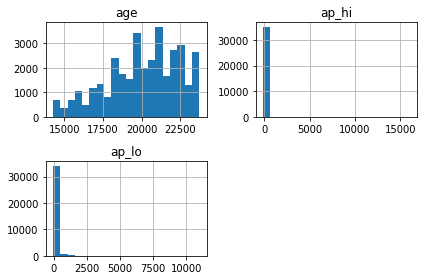

In [5]:
df[df["cardio"] == 1][["age", "ap_hi", "ap_lo"]].hist(bins=20)
plt.tight_layout()

**Проблема:** получили очень странные гистограммы.

**Решение:** данные нередко зашумлены или содержат ошибки, их нужно убирать.

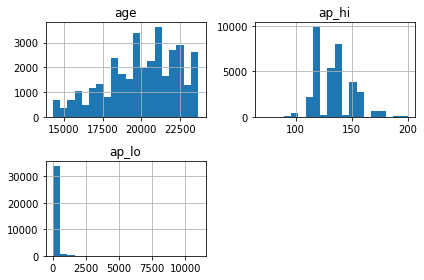

In [6]:
data = df[(df["ap_hi"] >= 50) & (df["ap_hi"] <= 200)]
data[data["cardio"] == 1][["age", "ap_hi", "ap_lo"]].hist(bins=20)
plt.tight_layout()

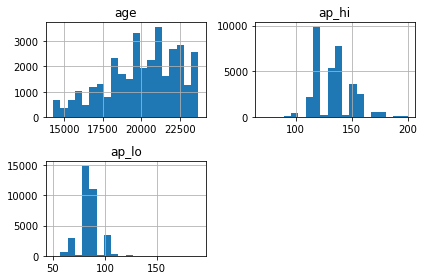

In [7]:
data = data[(data["ap_lo"] >= 50) & (data["ap_lo"] <= 200)]
data[data["cardio"] == 1][["age", "ap_hi", "ap_lo"]].hist(bins=20)
plt.tight_layout()

## Гауссов класификатор

Для непрерывной случайной величины, мы нередко можем сделать предположение, что она распределена по гауссу, в этом случае 

$$
P(x|C_k) = \frac{1}{\sqrt{2\pi  \sigma_k^2}} e^{-\frac{(x-\mu_k)^2}{2\sigma^2_k}}
$$

In [8]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

train = data[["age", "weight", "height"]]
target = data["cardio"]

model = gnb.fit(train, target)

predict = model.predict(train)
print(predict)

print(data.shape[0],
     (target == predict).sum() / data.shape[0])

[0 1 0 ... 1 1 1]
68703 0.6206279201781582


In [55]:
model.predict(train[1:2]), model.predict_proba(train[1:2])

(array([1]), array([[0.38787157, 0.61212843]]))

In [9]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(target, predict)

In [10]:
import itertools
class_names = ["Здоров", "Болен"]
def plot_confusion_matrix(cm, classes, normalize=False, title='Матрица неточностей', cmap=plt.cm.Blues):    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.min() + (cm.max() - cm.min()) * 2 / 3.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Истина')
    plt.xlabel('Предсказание')
    plt.tight_layout()

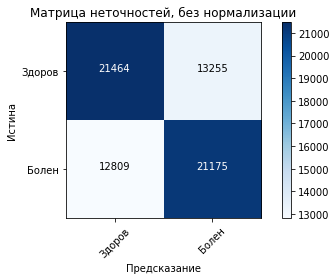

In [11]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, 
                      title='Матрица неточностей, без нормализации')
plt.show()

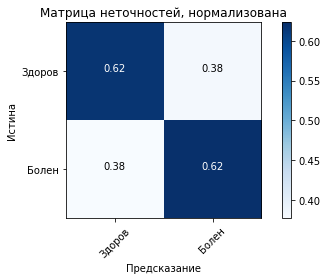

In [12]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,                      
                      title='Матрица неточностей, нормализована')
plt.show()

## Ещё немного наивного Байеса

Пакет **sklearn** помимо гауссова класификатора содержит

 * мультиномиальный класификатор __MultinomialNB__ или его чуть более доработанная версия **ComplementNB** (особенно в случае несбалансированных данных). Использует аддитивное сглаживание (additive smoothing). Является расширением биномиального распределения. Подходит для анализа текстов.
 * классификатор на основе распределения Бернулли __BernoulliNB__. Подходит для бинарных признаков.

## Факторизация

Подробнее можно почитать [здесь](https://habr.com/ru/company/surfingbird/blog/176461/)

В самом начале, мы сделали довольно сильно заявление - предположили, что все признаки независимы

$$
P(\vec{x}|y=1) = \prod_i P(x_i | y=1)
$$

В общем случае не так, поэтому рассмотрим довольно удобный способ факторизации $P(\vec{x}|y)$, т.н. байесовые сети доверия (направленый граф без направленных циклов).

Рассмотрим, что это такое на простейших случаях для событий __A__, __B__ и __C__.

Пусть все события независимы, тогда

$$
P(A,B,C) = P(A) P(B) P(C)
$$

это соответсвует диаграмме
<div><img style="margin-left:auto; margin-right: auto" src="./PAPBPC.png"/></div>

Пусть теперь событие __A__ зависит от события __B__

$$
P(A,B) = P(A|B)P(B)
$$

Это обозначают как:
<div><img style="margin-left:auto; margin-right: auto" src="./PAFPB.png"/></div>

Стоит отметить, что направление стрелки влияет только на способ записи факторизированного выражения. Для противоположного направления получим
$$
P(A,B) = P(B|A)P(A)
$$

Таким образом, условная вероятность в наивном байесовом классификаторе может быть представлена как

<div><img style="margin-left:auto; margin-right: auto" src="./b.png"/></div>

$$
P(\vec{x}|y) = \prod_n P(x_n|y)
$$

Случай посложнее

<div><img style="margin-left:auto; margin-right: auto" src="./PAPCFPB.png"/></div>

$$
P(A,B,C) = P(A|B) P(B) P(C|B)
$$

И еще один

<div><img style="margin-left:auto; margin-right: auto" src="./PAFPBFPC.png"/></div>

$$
P(A,B,C) = P(A|B) P(B|C) P(C)
$$

Можем воспользоваться теоремой Байеса в последнем выражении:

$$
P(A,B,C) = P(A|B) P(B|C) P(C) = \\ = P(A|B) \frac{P(B)P(C|B)}{P(C)} P(C) =\\= P(A|B) P(B) P(C|B)
$$

И последний интересный случай

<div><img style="margin-left:auto; margin-right: auto" src="./PBFPAPC.png"/></div>

$$
P(A,B,C) = P(B | A,C) P(A) P(C)
$$

## Что посмотреть дальше?

* скрытые марковские модели
* смеси распределений
* гауссовы процессы

## Что почитать?

* K.P. Murphy Machine Learning. A Probabilistic Perspective.
* C.E. Rasmussen and C.K.I. Williams. Gaussian Processes for Machine Learning